# Giriş


<div style="color:black;
           display:fill;
           border-radius:8px;
           background-color:#d3dcec;
           font-size:130%;
           font-family:Times New Roman;
           letter-spacing:0.5px">

<p style="padding: 15px;">
    Bu notebookta, Medical Cost Personal Veri Seti incelenmiştir. Verilen değişkenlere göre bir kişinin sağlık sigorta masrafının yaklaşık ne kadar olacağı tahmin edilmeye çalışılmıştır.  
    

    
    
</p>
</div>

***Veri Seti Linki:*** [**Medical Cost Personal Datasets**](https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download)
<font color = "darkgreen">
    
**İçerik:**
1. [Kütüphanelerin İçe Aktarılması](#1)
    
    
2. [Veriye Genel Bakış](#2)
    * [Veriyi Yükleme](#3)
    * [Betimsel İstatistik Değerleri](#4)
    * [Eksik Değer Kontrolü](#5)
    
    
3. [Keşifsel Veri Analizi](#6)
    * [BMI(Vücut Kitle İndeksi)'nin dağılımı:](#7)
    * [smoker ile charges arasındaki ilişki:](#8)
    * [smoker(Sigara tüketen) ile region(Bölge) arasındaki ilişki:](#9)
    * [bmi ile sex(Cinsiyet) arasındaki ilişkiyi:](#10)
    * [En çok children’a sahip region:](#11)
    * [Age ile bmi arasındaki ilişki:](#12)
    * [bmi ile children arasındaki ilişki:](#13)
    * [bmi değişkeninde outlier kontrolü:](#14)
    * [bmi ile charges arasındaki ilişki:](#15)
    * [region, smoker ve bmi arasındaki ilişkiyi bar plot kullanarak inceleme:](#16)

<a id = "1"></a><br>
## Kütüphanelerin İçe Aktarılması

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from scipy.stats import chi2_contingency

<a id = "2"></a><br>
## Veriye Genel Bakış

* Kolonlar: 
    * **age**: Sağlık sigortasından yararlanacak kişinin yaşı.
    * **sex**: Sağlık sigortasından yararlanacak kişinin cinsiyeti.
    * **bmi**: Sağlık sigortasından yararlanacak kişinin beden kitle indeksi. Boy ve kilo oranını kullanarak vücut ağırlığının objektif indeksi (kg / m ^ 2) bulunabilmektedir. 18,5 ile 24,9 oranları ideal indekstir. 
    * **children**: Kişinin bakmakla yükümlü olduğu kişi sayısı.
    * **region**: Sigara içme durumu.
    * **charges**: Sağlık sigortası tarafından faturalanan bireysel tıbbi masraflar

<a id = "3"></a><br>
**Veriyi Yükleme**

In [2]:
data = pd.read_csv('Datasets/insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<a id = "4"></a><br>
**Betimsel İstatistik Değerleri**

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


<a id = "5"></a><br>
**Eksik Değer Kontrolü**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<a id = "6"></a><br>
## Keşifsel Veri Analizi

<a id = "7"></a><br>
### `BMI`(Vücut Kitle İndeksi)'nin dağılımı:

* Histogram, hızlı ve çabuk bir şekilde bir değişkenin dağılımı hakkında fikir sahibi olunmasını sağlamaktadır. Sürekli sayısal değişken için geçerli olan histogram, sayıların belli gruplara bölünerek gösterimini sağlar. 
> BMI değişkenin dağılımı kontrol etmek için `Histogram Grafiğini` kontrol edelim.

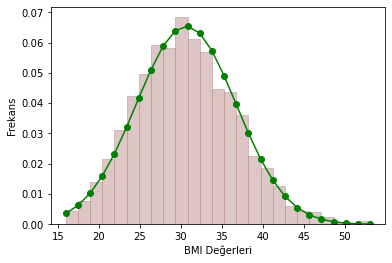

In [5]:
# Histogram plot parametreleri
_, bins, _ = plt.hist(data.bmi, bins = 25,
                      density = 1, alpha = 0.5,
                      color = 'rosybrown',
                      ec= 'rosybrown' )
# Bins -> Bidon olarak geçmekte ve 25 ayrı parcaya bolunmesini sağlar
# density -> yogunluk olarak gecmektedir. 
# Çan eğrisi için en uygun değerler

mu, sigma = stats.norm.fit(data.bmi)
best_fit_line = stats.norm.pdf(bins, mu, sigma)

# Çan eğrisi gösterimi
plt.plot(bins, best_fit_line, 'g-o')
plt.xlabel("BMI Değerleri")
plt.ylabel("Frekans")
plt.show()

* Grafik çok az sağa çarpık dağıldığı görünmekte. Normal dağılıp dağılmadığını istatistiksel olarak görmeye çalışalım.


* Normal dağılım sınaması için `Shapiro-Wilk` ve `Kolmogorov-Smirnov` en yaygın olarak kullanılan testler olup temelde hipotezleri aynıdır,

**H0**: Değişken normal dağılıma sahiptir. p-value > 0.05

**H1**: Değişken normal dağılıma sahip değildir. p-value < 0.05


**Kolmogorov-Smirnov** (Test edilecek veri 1000'den fazla olduğu için Shapiro-Wilk'e göre daha fazla tercih edilir. 

Kolmogorov-Smirnov, bir değişkenin dağılımını, kümülatif dağılım fonksiyonu (cumulative distribution function - CDF) yardımı ile normal dağılıma uyup uymadığını test eder. Veya, iki farklı değişken arasındaki ilişki CDF üzerinden test edilir.

In [6]:
# Kolmogorov–Smirnov test
bmi = data.bmi

bmiKSTest = stats.kstest(bmi, 'norm',
                         args=(bmi.mean(),
                               bmi.std()))

print(f"T: {bmiKSTest[0]} P-Value: {bmiKSTest[1]}")

T: 0.026099881197044095 P-Value: 0.3162798242838347


* BMI değişkeni için H0 hipotezi kabul edilmiştir (p-value > 0.05). Dolayısı ile değişkenin normal bir dağılım gösterdiği söylenebilir.

<a id = "8"></a><br>
### `smoker` ile `charges` arasındaki ilişki:

<a id = "9"></a><br>
### `smoker`(Sigara tüketen) ile `region`(Bölge) arasındaki ilişki:

* İki farklı kategorik değişken arasındaki ilişkiyi değerlendirmek için Çapraz Tablo oluşturup, Ki kare testi ile p-value değerini bulup hipotezi kabul edip etmeyeceğimizi görelim.

**H0:** Değişkenler birbiriyle ilişkili değildir. p-value > 0.05

In [21]:
#Çapraz tablosunun oluşturulması
crossTab =pd.crosstab(index=data['smoker'],columns=data['region'])
crossTab

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


In [22]:
# Ki kare testinin oluşturulması
kiKare = chi2_contingency(crossTab)
print('Ki kare testi sonucunda p-value değeri:', kiKare[1])

Ki kare testi sonucunda p-value değeri: 0.06171954839170547


* p-value 0,05'ten yüksek geldi. Dolayısıyla H0 kabul edilecektir. Bu, smoker ve region değişkenlerinin birbiriyle ilişkili olmadığı anlamına gelmektedir.

<a id = "10"></a><br>
### `bmi` ile `sex`(Cinsiyet) arasındaki ilişkiyi:

<a id = "11"></a><br>
### En çok `children`’a sahip `region`:

In [7]:
data.groupby("region").agg({"children":"sum"}).sort_values(by="children", ascending=False).reset_index()

,region,children
0,southeast,382
1,northwest,373
2,southwest,371
3,northeast,339


* `Southeast` bölgesinin en çok çocuğa(`382`) sahip bölge olduğu görülmekte. 

<a id = "12"></a><br>
### `Age` ile `bmi` arasındaki ilişki:

* Sayısal değişkenler arasındaki ilişki için, Plot Grafiğini, Korelasyon ve R-squared değerlerini inceleyelim.

> **Plot Grafiği**

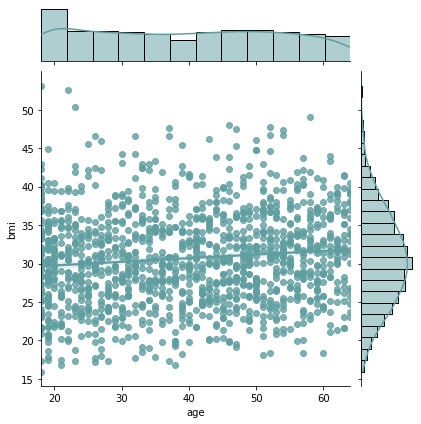

In [8]:
sns.jointplot(x = "age" , y = "bmi", data=data, kind = "reg",color = 'cadetblue');

* Plot grafiğinde görüldüğü üzere, Yaş ve Vücut Kütle İndeksi arasında herhangi bir ilişki görünmemekte. Yani yaş artıkça BMI değeri artıyor veya azalıyor denilememektedir.

> **Korelasyon Değeri**

In [9]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


* Korelasyon değerleri incelendiğinde, Yaş ve Vücut Kütle İndeksi arasında çok zayıf bir ilişki veya ilişki yok denilebilmektedir.

> **R-Squared Değeri**

In [20]:
xAge = sm.add_constant(data[["age"]])
yCharges = data['charges']

modelAC = sm.OLS(yCharges,xAge)
modelFitAC = modelAC.fit()
modelFitAC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Sun, 25 Sep 2022   Prob (F-statistic):           4.89e-29
Time:                        22:29:23   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3165.8850    937.149      3.378      0.001    1327.440    5004.330
age          257.7226     22.502     11.453      0.000     213.579     301.866
==============================================================================
Omnibus:                      399.600   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              864.239
Skew:                           1.733   Prob(JB):                    2.15e-188
Kurtosis:                       4.869   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* R-squared değeri, bağımsız değişkenin bağımlı değişkendeki değişkenliği açıklama başarısıdır. Yani age değişkeni charges değişkeninde yer alan değişkenliğin yaklaşık %9'nu açıklayabilmektedir.

<a id = "13"></a><br>
### `bmi` ile `children` arasındaki ilişki:

<a id = "14"></a><br>
### `bmi` değişkeninde outlier kontrolü:

> Outlier değere hızlı bir bakış için: ***Boxplot*** Grafiğini kontrol edelim.

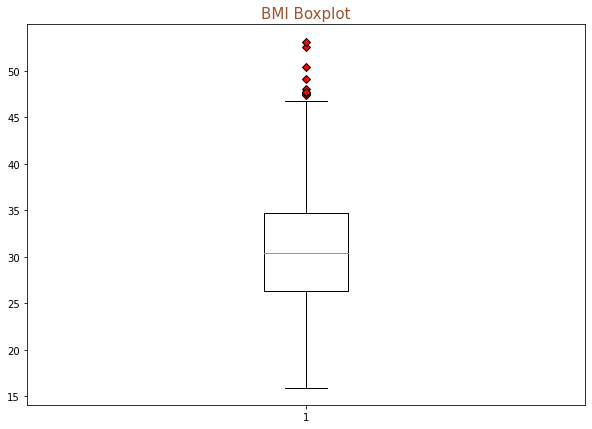

In [11]:
green_diamond = dict(markerfacecolor='r', marker='D')

fig, ax1 = plt.subplots(1, figsize = (10, 7))
 
ax1.boxplot(data["bmi"],flierprops=green_diamond)
ax1.set_title("BMI Boxplot",
              fontdict=dict(
                family="DejaVu Sans",
                size=15,
                color="sienna"))

 
plt.show();

* Grafikte, değişken için kırmızı noktalarla temsil edilen ve kutunun dışarısında kalan **aykırı değerler bulunduğunu** görebilmekteyiz. 

* Aykırı değerlere daha dayanıklı olan `Çeyrekler Açıklığı (IQR)` metodunu kullanarak aykırı değerleri tespit edelim.

**Çeyrekler Açıklığı (IQR)**

In [12]:
def iqr(df,degisken):
    
    """
        Bu fonksiyon ile Çeyrekler Açıklığı Yöntemi kullanılarak, aykırı değerler tespit edilmiştir. 
    """
    
    # 1 ve 3. çeyrekllik hesaplama
    q1 = np.quantile(df[degisken], 0.25)
    q3 = np.quantile(df[degisken], 0.75)
    # iki çeyrek arasındaki %50’lik dilim
    diff = q3 - q1
    # alt ve üst eşik değerlerini hesaplarken 1. çeyrekten 1.5 kat az, 3. çeyrekten de 1.5 kat fazla olan değeri 
    #sınır olarak belirle
    lower_t = q1 - (1.5 * diff)
    upper_t = q3 + (1.5 * diff)
    #eşik değerlerin altında ve üstünde kalan değerleri döndür
    return (df[(df[degisken] < lower_t) | (df[degisken] > upper_t)]),lower_t,upper_t 

In [13]:
bmiOutlier,lowerThresh,upperThresh = iqr(data, "bmi")
print("Çeyrekler Açıklığı (IQR) Yöntemine Göre: ") 
print(f"TUKETILEN_ENERJI_KWH Değişkeninde Bulunan Aykırı Değer Miktarı: {len(bmiOutlier)}")
print(f"Lower Thresh Değeri: {lowerThresh} | Upper Thresh Değeri: {upperThresh}") 

Çeyrekler Açıklığı (IQR) Yöntemine Göre: 
TUKETILEN_ENERJI_KWH Değişkeninde Bulunan Aykırı Değer Miktarı: 9
Lower Thresh Değeri: 13.7 | Upper Thresh Değeri: 47.290000000000006


<a id = "15"></a><br>
### `bmi` ile `charges` arasındaki ilişki:

* Sayısal değişkenler arasındaki ilişki için, Plot Grafiğini, Korelasyon ve R-squared değerlerini inceleyelim.

> **Plot Grafiği**

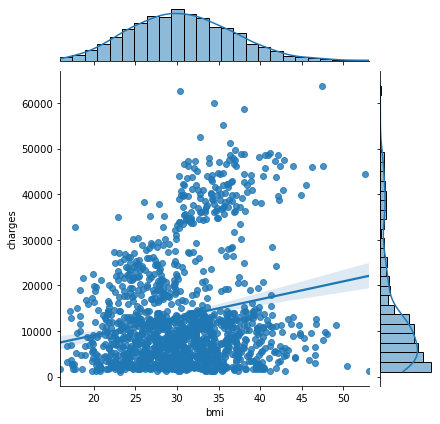

In [30]:
sns.jointplot(x = "bmi" , y = "charges", data=data, kind = "reg");

* Plot grafiğinde görüldüğü üzere, Vücut Kütle İndeksi ve Masraflar arasında ilişki yok denilecek kadar azdır.

> **Korelasyon Değeri**

In [31]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


* Korelasyon değerleri incelendiğinde, Vücut Kütle İndeksi ve Masraflar arasında çok zayıf bir ilişki veya ilişki yok denilebilmektedir.

> **R-Squared Değeri**

In [32]:
xBmi = sm.add_constant(data[["bmi"]])
yCharges = data['charges']

modelBC = sm.OLS(yCharges,xBmi)
modelFitBC = modelBC.fit()
modelFitBC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     54.71
Date:                Sun, 25 Sep 2022   Prob (F-statistic):           2.46e-13
Time:                        22:47:32   Log-Likelihood:                -14451.
No. Observations:                1338   AIC:                         2.891e+04
Df Residuals:                    1336   BIC:                         2.892e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1192.9372   1664.802      0.717      0.474   -2072.974    4458.849
bmi          393.8730     53.251      7.397      0.000     289.409     498.337
==============================================================================
Omnibus:                      261.030   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              431.091
Skew:                           1.297   Prob(JB):                     2.45e-94
Kurtosis:                       4.004   Cond. No.                         160.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* `bmi` değişkeni `charges` değişkeninde yer alan değişkenliğin yaklaşık %4'ünü açıklayabilmektedir.

<a id = "16"></a><br>
### `region`, `smoker` ve `bmi` arasındaki ilişkiyi bar plot kullanarak inceleme: